# Third Version Model 

- Author: Wen Xin
- Description: This is the third version of ridge model.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('data_final.csv')

In [3]:
list(data.columns)

['order_sd',
 'active_days',
 'lastgap',
 'avg_gap',
 'min_gap',
 'max_gap',
 'w1_total_orders',
 'w2_total_orders',
 'w3_total_orders',
 'w4_total_orders',
 'w5_total_orders',
 'w6_total_orders',
 'w7_total_orders',
 'label',
 'first_order',
 'last_order',
 'accountLength',
 'overall_time_mean',
 'update2create_time_mean',
 'send2update_time_mean',
 'overall_time_min',
 'update2create_time_min',
 'send2update_time_min',
 'overall_time_max',
 'update2create_time_max',
 'send2update_time_max',
 'intime_rate',
 'last_coupon_fee',
 'last_send_type',
 'order_nums',
 'city_id',
 'sex',
 'age',
 'login_platform_b',
 'app_version_b',
 'age_na',
 'lastgap_na',
 'avg_gap_na',
 'min_gap_na',
 'max_gap_na',
 'overall_time_mean_na',
 'update2create_time_mean_na',
 'send2update_time_mean_na',
 'overall_time_min_na',
 'update2create_time_min_na',
 'send2update_time_min_na',
 'overall_time_max_na',
 'update2create_time_max_na',
 'send2update_time_max_na',
 'pca_1',
 'pca_2',
 'pca_3',
 'pca_4',
 'pca

In [4]:
# this piece of code from one kaggle
# 看看有没有NAN什么的,Type Error说明没有NAN了！
import matplotlib.pyplot as plt
nan_value = data.isnull().sum()
nan_value = nan_value[nan_value > 0]
nan_value.sort_values(inplace=True,ascending=False)
nan_value.plot.bar()

In [5]:
X=data
y=data['label']
#先删了吧= 。 =晚点再处理
X=X.drop(['label','label.1',
 '05/30/2016count',
 '05/31/2016count',
 '06/01/2016count',
 '06/02/2016count',
 '06/03/2016count',
 '06/04/2016count',
 '06/05/2016count',
 '06/06/2016count',
 '06/07/2016count',
 '06/08/2016count',
 '06/09/2016count',
 '06/10/2016count',
 '06/11/2016count',
 '06/12/2016count'],axis=1)

In [6]:
X=X.fillna(0)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import RidgeClassifier

In [9]:
ridge=RidgeClassifier()
ridge.fit(X_train,y_train)
ridge_predict=ridge.predict(X_test)

In [17]:
from sklearn import metrics

In [18]:
print(metrics.classification_report(y_train, ridge_train_predict))

             precision    recall  f1-score   support

        0.0       0.84      0.93      0.88    108250
        1.0       0.77      0.58      0.66     45234

avg / total       0.82      0.82      0.82    153484



In [19]:
print(metrics.classification_report(y_test, ridge_predict))

             precision    recall  f1-score   support

        0.0       0.84      0.92      0.88     27008
        1.0       0.76      0.59      0.67     11363

avg / total       0.82      0.82      0.82     38371



In [20]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds2 = roc_curve(y_test,ridge_predict)

Text(0.5,1,'ROC curve')

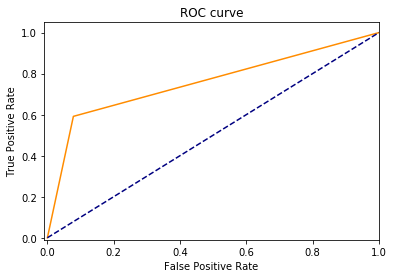

In [21]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange',label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [22]:
# baseline1

In [23]:
ridge_train_predict=ridge.predict(X_train)

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ridge_predict)

0.7566619645984535

In [25]:
roc_auc_score(y_train,ridge_train_predict)

0.7539678988224537

In [26]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [60]:
X_train2=scaler.fit_transform(X_train)
X_test2=scaler.transform(X_test)

In [61]:
ridge2=RidgeClassifier()
ridge2.fit(X_train2,y_train)
ridge_predict2=ridge2.predict(X_test2)

In [62]:
ridge_train_predict2=ridge2.predict(X_train2)

In [63]:
fpr, tpr, thresholds2 = roc_curve(y_test,ridge_predict2)

Text(0.5,1,'ROC curve')

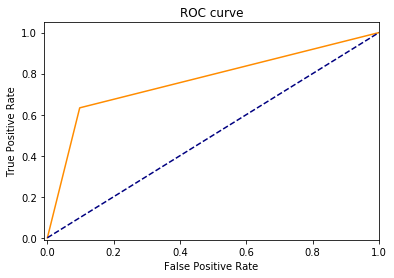

In [64]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange',label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [65]:
# baseline2
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ridge_predict2)

0.7678969155862776

In [66]:
roc_auc_score(y_train, ridge_train_predict2)

0.7855249685350162

In [67]:
print(metrics.classification_report(y_train, ridge_train_predict2))

             precision    recall  f1-score   support

        0.0       0.85      0.95      0.90    103770
        1.0       0.83      0.63      0.71     45234

avg / total       0.85      0.85      0.84    149004



In [69]:
print(metrics.classification_report(y_test, ridge_predict2))

             precision    recall  f1-score   support

        0.0       0.85      0.90      0.88     27008
        1.0       0.73      0.63      0.68     11363

avg / total       0.82      0.82      0.82     38371



In [37]:
from sklearn.linear_model import Ridge

In [38]:
clf = Ridge()
clf.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
prediction2=clf.predict(X_train)

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

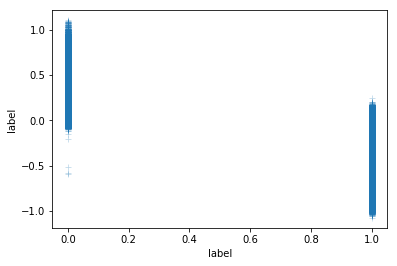

In [41]:
# resident plot
sns.scatterplot(x=y_train, y=(prediction2-y_train),alpha=0.3,marker="+")

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train['residual']=abs(prediction2-y_train)

In [44]:
X_train['residual'].describe()

count    1.534840e+05
mean     2.555134e-01
std      2.441553e-01
min      2.139295e-07
25%      5.883801e-02
50%      1.699731e-01
75%      3.893168e-01
max      1.105394e+00
Name: residual, dtype: float64

In [45]:
X_train['label']=y_train

In [46]:
X_train_rest=X_train[(X_train['residual']>0.6) & (X_train['label']==0)]

In [47]:
X_train_new=pd.concat([X_train, X_train_rest], ignore_index=True)

In [48]:
X_train_new=X_train_new.drop_duplicates(keep=False)

In [49]:
X_train_new['residual'].describe()

count    1.490040e+05
mean     2.413044e-01
std      2.324061e-01
min      2.139295e-07
25%      5.663067e-02
50%      1.616764e-01
75%      3.626393e-01
max      1.077390e+00
Name: residual, dtype: float64

In [50]:
y_train=X_train_new['label']
X_train=X_train_new.drop(['residual','label'],axis=1)

In [51]:
ridge=RidgeClassifier()
ridge.fit(X_train,y_train)
train_predict=ridge.predict(X_train)
test_predict=ridge.predict(X_test)

In [52]:
roc_auc_score(y_train,train_predict)

0.7856746191846342

In [53]:
roc_auc_score(y_test,test_predict)

0.7677278821275129

In [54]:
print(metrics.classification_report(y_train, train_predict))

             precision    recall  f1-score   support

        0.0       0.85      0.95      0.90    103770
        1.0       0.83      0.63      0.71     45234

avg / total       0.85      0.85      0.84    149004



In [55]:
print(metrics.classification_report(y_test, test_predict))

             precision    recall  f1-score   support

        0.0       0.85      0.90      0.88     27008
        1.0       0.73      0.63      0.68     11363

avg / total       0.82      0.82      0.82     38371



In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
parameters = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100 ,1000]}

In [74]:
ridge3=RidgeClassifier()
gs = GridSearchCV(ridge3, parameters, scoring='roc_auc', cv=10)
gs.fit(X_train2, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [75]:
gs.cv_results_['mean_test_score']

array([0.89486545, 0.89486588, 0.89486748, 0.89487416, 0.89489699,
       0.89500455, 0.8952009 ])

In [76]:
parameters = {'alpha':[1, 2, 3, 4, 5, 6 ,7, 8, 9]}
ridge3=RidgeClassifier()
gs = GridSearchCV(ridge3, parameters, scoring='roc_auc', cv=10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [77]:
gs.cv_results_['mean_test_score']

array([0.89487459, 0.89487934, 0.89488266, 0.89488653, 0.89488975,
       0.89489292, 0.89489552, 0.89489764, 0.89489951])

In [94]:
ridge4=RidgeClassifier(alpha=3)
ridge4.fit(X_train,y_train)
ridge_predict4=ridge4.predict(X_test)

In [95]:
ridge_predict_train4=ridge4.predict(X_train)

In [96]:
roc_auc_score(y_train,ridge_predict_train4)

0.7855793873016718

In [97]:
roc_auc_score(y_test,ridge_predict4)

0.7679894807521545

In [98]:
print(metrics.classification_report(y_train,ridge_predict_train4))

             precision    recall  f1-score   support

        0.0       0.85      0.95      0.90    103770
        1.0       0.83      0.63      0.71     45234

avg / total       0.85      0.85      0.84    149004



In [99]:
print(metrics.classification_report(y_test,ridge_predict4))

             precision    recall  f1-score   support

        0.0       0.85      0.90      0.88     27008
        1.0       0.73      0.63      0.68     11363

avg / total       0.82      0.82      0.82     38371

